# Program to predict the brain size using headweight

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hbs = pd.read_csv("headbrain.csv")
hbs.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
hbs.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [6]:
hbs.shape

(237, 4)

In [9]:
hbs.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

In [12]:
hbs['Gender'].value_counts()

1    134
2    103
Name: Gender, dtype: int64

In [13]:
# What is the meaning of AgeRange as it has 2 values only?
hbs['AgeRange'].value_counts()

2    127
1    110
Name: AgeRange, dtype: int64

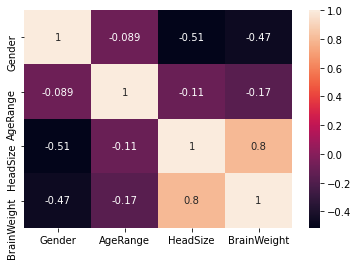

In [15]:
sns.heatmap(hbs.corr(), annot=True)

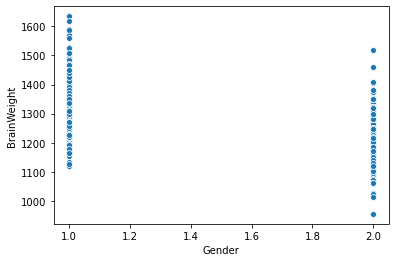

In [16]:
sns.scatterplot(x="Gender", y="BrainWeight", data=hbs)

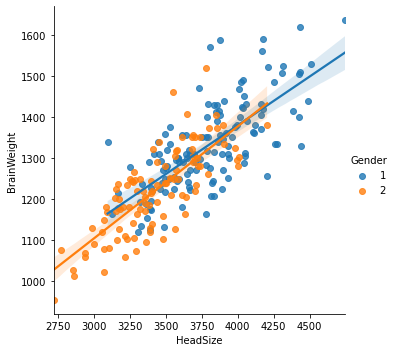

In [19]:
sns.lmplot(x="HeadSize", y="BrainWeight", data=hbs, hue="Gender")

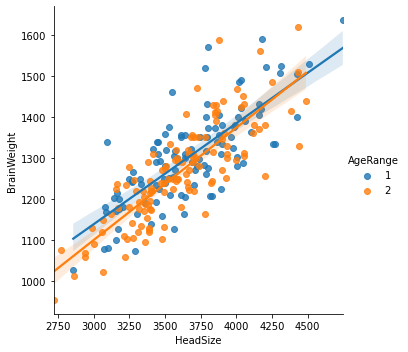

In [20]:
sns.lmplot(x="HeadSize", y="BrainWeight", data=hbs, hue="AgeRange")

# I see that there is slight depedency on AgeRange and Gender on our Dependent variable and HeadSize

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

Keeping all the variables for predicting brainsize

In [23]:
x = hbs.drop(["BrainWeight"],1)
y = hbs["BrainWeight"]
print(x.head())
print(y.head())

   Gender  AgeRange  HeadSize
0       1         1      4512
1       1         1      3738
2       1         1      4261
3       1         1      3777
4       1         1      4177
0    1530
1    1297
2    1335
3    1282
4    1590
Name: BrainWeight, dtype: int64


In [40]:
lm = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=101)

In [41]:
lm.fit(x_train, y_train)

LinearRegression()

In [42]:
pred = lm.predict(x_test)

In [44]:
print(mean_squared_error(y_test, pred))

4505.943072403089


In [45]:
print(np.sqrt(mean_squared_error(y_test, pred)))

67.12632175535234


In [46]:
print(mean_absolute_error(y_test, pred))

52.94049721643085


In [48]:
print(r2_score(y_test, pred))

0.6631015742808894


Keeping only headsize as X

In [63]:
x = hbs[["HeadSize"]]
y = hbs["BrainWeight"]

In [73]:
def rstate():
    rscore = []
    for i in range(1,201):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=i)
        lm.fit(x_train, y_train)
        pred = lm.predict(x_test)
        #print(mean_squared_error(y_test, pred))
        #print(np.sqrt(mean_squared_error(y_test, pred)))
        #print(mean_absolute_error(y_test, pred))
        #print(r2_score(y_test, pred))
        rscore.append(r2_score(y_test, pred))
    return rscore.index(max(rscore))+1

In [74]:
print("Best randomstate is:",rstate())

Best randomstate is: 194


In [78]:
rs = rstate()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=rs)
lm.fit(x_train, y_train)

LinearRegression()

In [79]:
pred = lm.predict(x_test)

In [80]:
print(mean_squared_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))
print(mean_absolute_error(y_test, pred))
print(r2_score(y_test, pred))

4015.0881258135214
63.36472303903428
51.88643715152356
0.7505119062113702
